<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/MultivariateTime_Series_Modeling_Using_FaceBook_Prophet._.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
data = pd.read_csv('/content/nyc_energy_consumption.csv')

In [4]:
data.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [5]:
data.tail()

,timeStamp,demand,precip,temp
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59
49204,2017-08-12 06:00:00,NaN,0.0031,67.33


In [6]:
data.shape

(49205, 4)

In [7]:
data.isnull().sum()

timeStamp      0
demand        81
precip       230
temp         186
dtype: int64

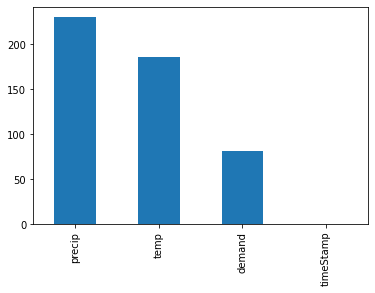

In [10]:
data.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [11]:
data.nunique()

timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64

## Data Visualization and Data Preprocessing.

In [13]:
data.set_index('timeStamp',inplace=True)

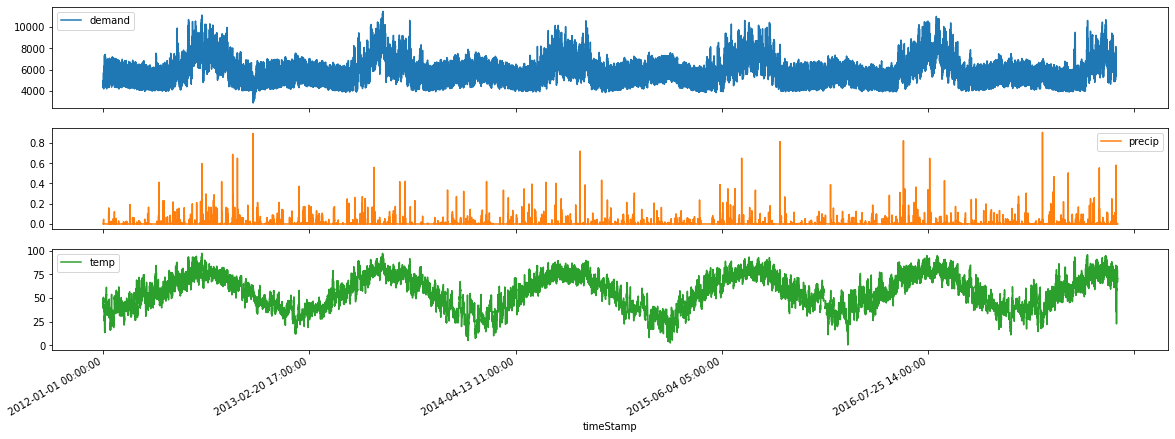

In [15]:
data.plot(subplots=True,figsize=(20,7))
plt.show()

In [17]:
demand_null_data=data[data['demand'].isnull()]
precip_null_data=data[data['precip'].isnull()]
temp_null_data=data[data['temp'].isnull()]

In [20]:
data.index = pd.to_datetime(data.index)

In [21]:
data['Month'] = data.index.month  #Added the columns as Month so that we can handel the mutivarinat data with time series.

### Handeling Data Missing Values

In [22]:
data['demand'] = data['demand'].fillna(method='ffill')
data['precip'] = data['precip'].fillna(method='ffill')
data['temp'] = data['temp'].fillna(method='ffill')

In [23]:
data.isnull().any()

demand    False
precip    False
temp      False
Month     False
dtype: bool

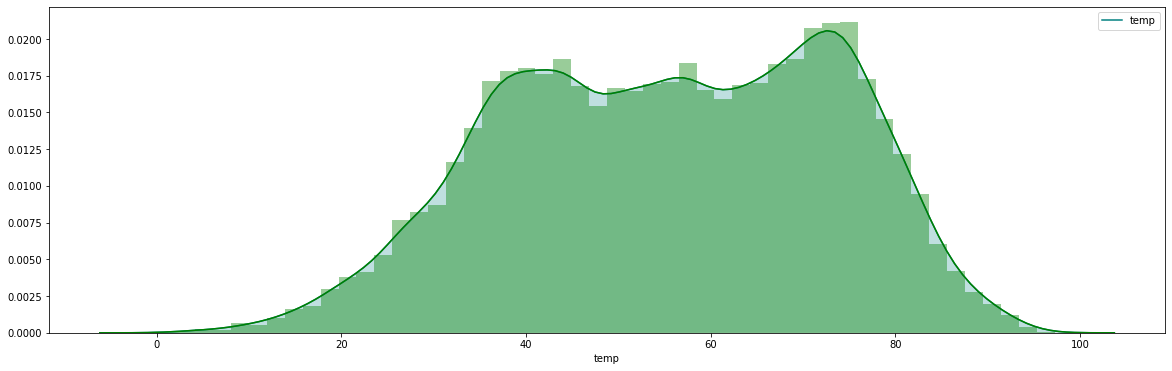

In [28]:
plt.figure(figsize=(20,6))
ax = sns.kdeplot(data['temp'],color='teal',shade=True)
sns.distplot(data['temp'],color='g')
plt.show()

From the above we can there is more outliers are present inside the data.It seems like biomodel distribiution.

In [35]:
data.reset_index(inplace=True)

In [37]:
fig = px.line(data, x='timeStamp', y='demand', title='Time Series with demand Distribution along the date')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1year", step="year", stepmode="backward"),
            dict(count=1, label="2year", step="year", stepmode="backward"),
            dict(count=1, label="3year", step="year", stepmode="todate"),
            dict(count=1, label="4year", step="year", stepmode="backward"),
            dict(count=1, label="5year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [38]:
fig = px.line(data, x='timeStamp', y='temp', title='Time Series with demand Distribution along the date')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1year", step="year", stepmode="backward"),
            dict(count=1, label="2year", step="year", stepmode="backward"),
            dict(count=1, label="3year", step="year", stepmode="todate"),
            dict(count=1, label="4year", step="year", stepmode="backward"),
            dict(count=1, label="5year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [39]:
corrmat = data[['demand','temp']].corr()
corrmat

,demand,temp
demand,1.000000,0.509724
temp,0.509724,1.000000


In [59]:
summar_correlation=data[data['temp']>=80][['temp','demand']].corr()
summar_correlation

,temp,demand
temp,1.000000,0.576395
demand,0.576395,1.000000


In [60]:
Normal_correlation=data[data['temp']<80][['temp','demand']].corr()
Normal_correlation

,temp,demand
temp,1.000000,0.350952
demand,0.350952,1.000000


From we can understand alomost the 50 % positive correlation is avalible in demand and temp.


In [44]:
data[['Month','temp']].groupby('Month').agg({'temp':['mean','max','median']})

temp               
            mean    max  median
Month                          
1      33.454881  62.00  34.700
2      34.523203  69.66  34.690
3      41.420610  75.96  40.550
4      52.600204  86.22  52.195
5      62.543994  93.34  61.255
6      71.332347  95.82  71.100
7      77.592433  97.26  76.925
8      75.555402  94.86  75.070
9      69.547839  92.72  69.330
10     58.652836  84.80  58.670
11     47.225972  71.47  46.945
12     41.624304  68.82  40.995

From the above we can easily understand the temp with high magnitude are avalibe above the 80 in most of month,as well as meadian temp is also avalible in between the month 34 to 70.

and minimum temp is nearer to 40.

In [48]:
def temp(ser):
  if ser>=80:
    return 1
  else:
    return 0
  

In [49]:
data['summer_temp'] = data['temp'].apply(temp)

In [54]:
data['summer_temp'].value_counts()

0    45673
1     3532
Name: summer_temp, dtype: int64

In [55]:
data['Months_bins'] = pd.cut(data['Month'],bins=3,labels=False)

In [57]:
data['Months_bins'].head()

0    0
1    0
2    0
3    0
4    0
Name: Months_bins, dtype: int64

In [58]:
data.head()

,timeStamp,demand,precip,temp,Month,summer_temp,Months_bins
0,2012-01-01 00:00:00,4937.5,0.0,46.13,1,0,0
1,2012-01-01 01:00:00,4752.1,0.0,45.89,1,0,0
2,2012-01-01 02:00:00,4542.6,0.0,45.04,1,0,0
3,2012-01-01 03:00:00,4357.7,0.0,45.03,1,0,0
4,2012-01-01 04:00:00,4275.5,0.0,42.61,1,0,0


In [65]:
data.columns = ['ds','y','precip','temp','Month','summer_temp','Months_bins']

In [66]:
data.columns

Index(['ds', 'y', 'precip', 'temp', 'Month', 'summer_temp', 'Months_bins'], dtype='object')

## Model Preperation.

In [67]:
train_data=data[((data['ds']>='2012-01-01') & (data['ds']<='2017-04-30')) ]

In [68]:
test_data=data[(data['ds']>'2017-04-30')]

In [70]:
train_data.shape

(46703, 7)

In [71]:
test_data.shape

(2502, 7)

In [72]:
from fbprophet import Prophet
from fbprophet.plot import plot_components,plot_cross_validation_metric,plot_plotly
from fbprophet.diagnostics import cross_validation

In [73]:
model = Prophet(yearly_seasonality=True,interval_width=0.95)

In [76]:
model.add_regressor('summer_temp',standardize=False) #additive
model.add_regressor('Months_bins',standardize=False,mode='multiplicative')#multiplicative

In [77]:
model.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [78]:
future_dates = model.make_future_dataframe(periods=365)

In [79]:
future_dates.tail()

,ds
47063,2018-04-26
47064,2018-04-27
47065,2018-04-28
47066,2018-04-29
47067,2018-04-30


If we are predicting the future dates we do not know what will be the values of temp of month for the future dates.In this case if we better understanding of bussiness is required as well as It required third party data provider with the prediction.

In [80]:
future_dates['summer_temp'] = data['summer_temp']
future_dates['Months_bins'] = data['Months_bins']

In [81]:
future_dates.head()

,ds,summer_temp,Months_bins
0,2012-01-01 00:00:00,0,0
1,2012-01-01 01:00:00,0,0
2,2012-01-01 02:00:00,0,0
3,2012-01-01 03:00:00,0,0
4,2012-01-01 04:00:00,0,0


In [85]:
y_prediction = model.predict(future_dates)

In [86]:
y_prediction[['ds','yhat_lower','yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
47063,2018-04-26,-159.639284,8768.551648,4736.894141
47064,2018-04-27,-116.180289,8802.276663,4728.299146
47065,2018-04-28,-299.635359,8723.387891,4471.206509
47066,2018-04-29,-813.734439,7785.321597,3890.219492
47067,2018-04-30,-224.050979,8577.566476,4327.551045


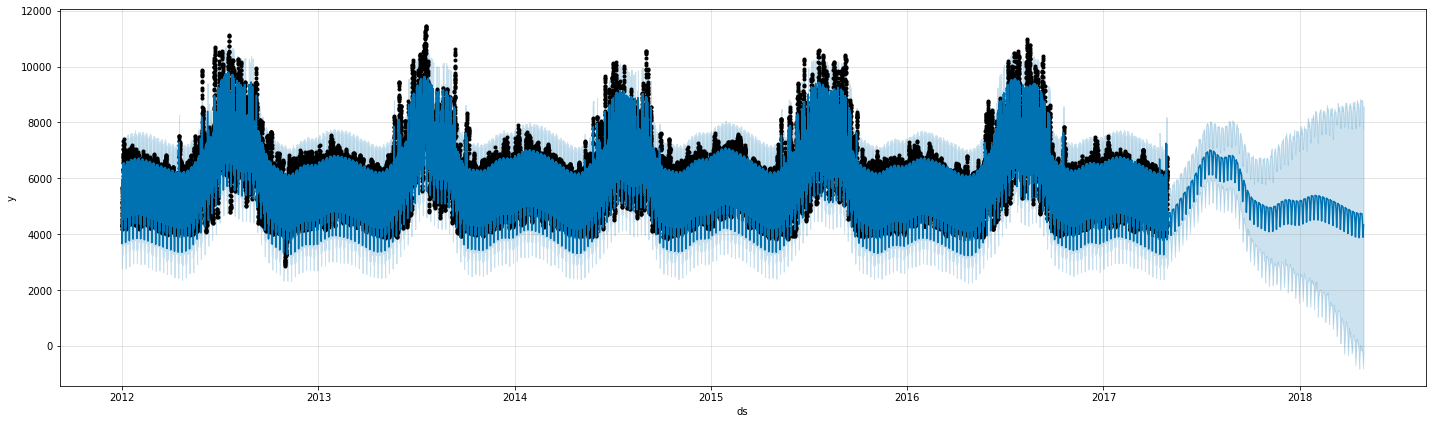

In [90]:
model.plot(y_prediction,figsize=(20,6))
plt.show()

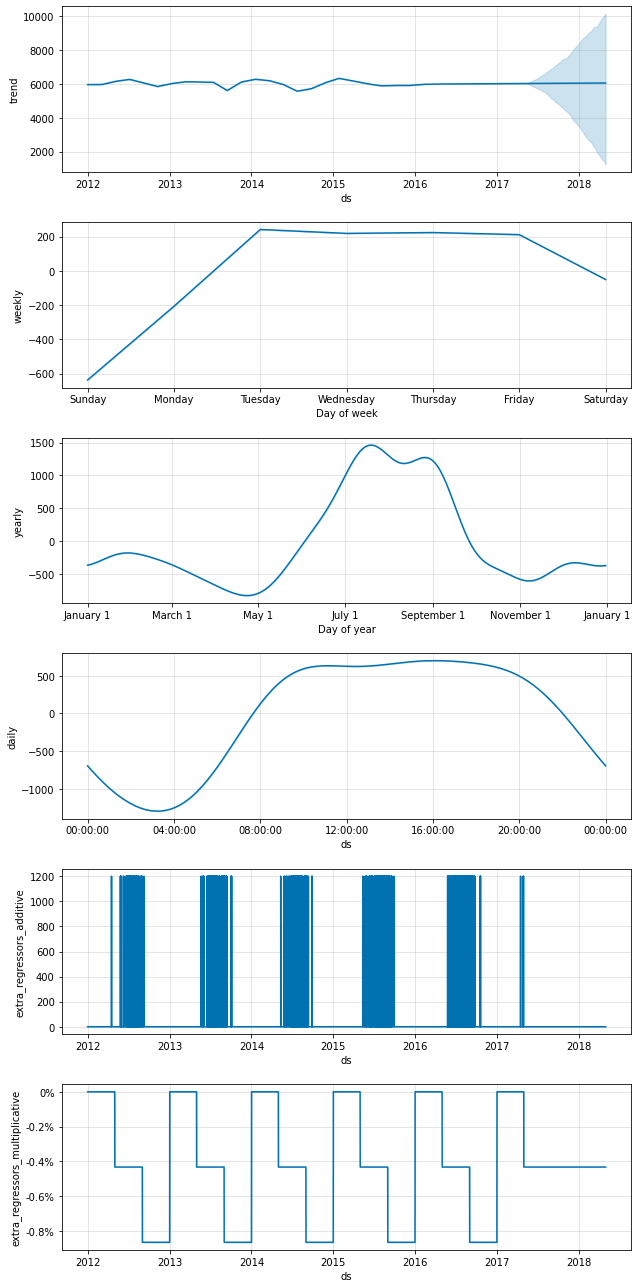

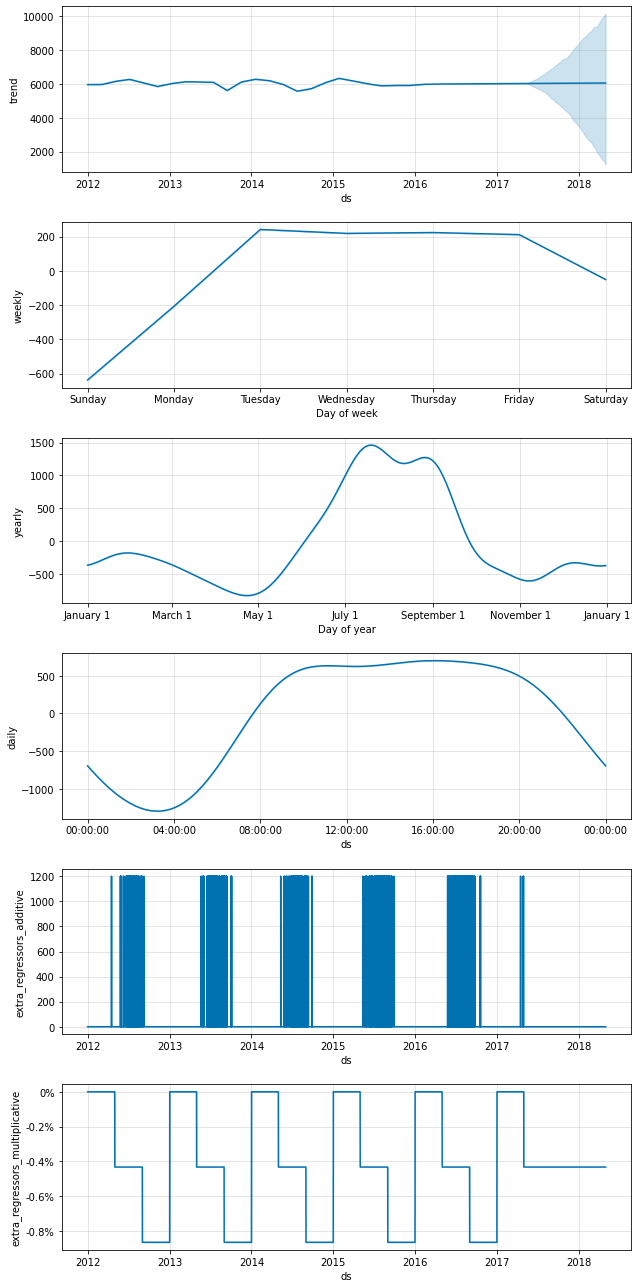

In [91]:
model.plot_components(y_prediction)

In [93]:
from fbprophet.diagnostics import performance_metrics
cv = cross_validation(model,horizon='365 days',initial='1095 days')
matrix = performance_metrics(cv)
matrix.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-05-01 00:00:00 and 2016-04-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251859.391424,501.855947,380.978977,0.068639,0.055641,0.926913
1,36 days 13:00:00,251948.922216,501.945139,381.116818,0.068660,0.055641,0.926913
2,36 days 14:00:00,252047.532293,502.043357,381.265699,0.068685,0.055697,0.926913
3,36 days 15:00:00,252157.516251,502.152881,381.438047,0.068714,0.055744,0.926913
4,36 days 16:00:00,252259.046491,502.253966,381.608603,0.068742,0.055925,0.926913


In [94]:
from fbprophet.plot import plot_cross_validation_metric

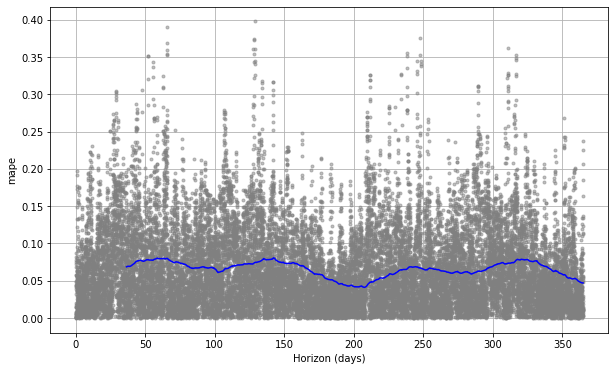

In [95]:
plot_cross_validation_metric(cv,'mape')
plt.show()

Since the mape is lesser in the metric.

In [97]:
matrix['mape'].max()

0.08061523774520378

In [98]:
matrix['mape'].min()

0.041103549325905465

In [99]:
matrix['mape'].median()

0.06712778212446435

# Holidays in the Time Series analysis:

https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

## Thank You !!